# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import numpy as np
import pandas as pd

import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
# your answer here
path = 'C:/Users/haenni/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Employee.csv'
employee = pd.read_csv(path)
employee.head()

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# Method 1
# your answer here
employee.groupby('Department').agg({'Salary':'mean'})

Salary
Department        
HR           45.00
IT           48.75
Sales        55.00

In [6]:
# Method 2
# your answer here
employee.pivot_table(index=["Department"], values=["Salary"])

Salary
Department        
HR           45.00
IT           48.75
Sales        55.00

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [8]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary"], fill_value='-')

Salary                  
Title          VP analyst associate
Department                         
HR             70    32.5         -
IT             70    32.5        60
Sales           -       -        55

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title", 'Years'], values=["Salary"], fill_value='-')

Salary                                  
Title          VP analyst         associate        
Years           8       1   2   4         2   3   7
Department                                         
HR             70       -  30  35         -   -   -
IT             70      35  30   -         -   -  60
Sales           -       -   -   -        55  55   -

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [18]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary", 'Name'], aggfunc= {'Salary':np.mean, 'Name': 'count' }, fill_value='-').rename(columns={'Name': '# Employe', 'Salary': 'Avg. Salary'})


# Employe                   Avg. Salary                  
Title             VP analyst associate          VP analyst associate
Department                                                          
HR                 1       2         -          70    32.5         -
IT                 1       2         1          70    32.5        60
Sales              -       -         2           -       -        55

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [26]:
# your answer here
empl2=employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary"], aggfunc=[np.median,np.min, np.max, np.std])
empl2


median                     amin                     amax          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    32.5       NaN   70.0    30.0       NaN   70.0    35.0   
IT           70.0    32.5      60.0   70.0    30.0      60.0   70.0    35.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

#### Based on your comments, fill the missing values with an appropriate value.

In [40]:
# your answer here
## you can see, that both persons in sale earn the same : 55, so thats why we also have a std. of 0.  however, in Sales we only have associate, so we can not make conclusionsf for the other Jop titels
## we see, that VP and Analyst have the same salarys in HR and IT, so an assosiate should also earn the same in HR as in IT ? 

## howewer, filling missing values like that i think is not a good idea, because, its misslinding information, maybe the job profile of an associate in HR is different compared to one in IT, also maybe there are no associates in HR...

# but to practice:

empl2['median']['Salary']['associate']=empl2['median']['Salary']['associate'].fillna(60)
empl2['amin']['Salary']['associate']=empl2['amin']['Salary']['associate'].fillna(60)
empl2['amax']['Salary']['associate']=empl2['amax']['Salary']['associate'].fillna(60)

empl2.fillna('-')

median                     amin                     amax          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70    32.5      60.0     70      30      60.0     70      35   
IT             70    32.5      60.0     70      30      60.0     70      35   
Sales           -       -      55.0      -       -      55.0      -       -   

                          std            
                       Salary            
Title      associate  analyst associate  
Department                               
HR              60.0  3.53553         -  
IT              60.0  3.53553         -  
Sales           55.0        -         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [44]:
# your answer here
employee.pivot_table(index=["Department"], values=['Name', "Salary"], aggfunc= { 'Name': 'count', 'Salary':np.sum}, fill_value='-').rename(columns={'Name': '# Employees', 'Salary': 'Total Salary'})


# Employees  Total Salary
Department                           
HR                    3           135
IT                    4           195
Sales                 2           110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [45]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"], values=['Years', "Salary"], aggfunc= { 'Years': np.sum, 'Salary':np.mean}, fill_value='-').rename(columns={'Years': 'Total Years of Experience', 'Salary': 'Avg. Salary'})


Avg. Salary                   Total Years of Experience          \
Title               VP analyst associate                        VP analyst   
Department                                                                   
HR                  70    32.5         -                         8       6   
IT                  70    32.5        60                         8       3   
Sales                -       -        55                         -       -   

                      
Title      associate  
Department            
HR                 -  
IT                 7  
Sales              5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [46]:
# your answer here
path = 'C:/Users/haenni/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv'
fitbit = pd.read_csv(path)
fitbit.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  08-05-2015            1934    905      0.65       0              1.355   
1  09-05-2015            3631  18925     14.11       4            611.000   
2  10-05-2015            3204  14228     10.57       1            602.000   
3  11-05-2015            2673   6756      5.02       8            749.000   
4  12-05-2015            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               1680             384                   26                23   
1               2248             454                   35                21   
2               1719             387                   46                25   
3               9620             311                   31                21   
4               7360             407                   65                44   

   LengthOfRestInMinutes  
0                    417  
1                    491  
2                    436  
3                    350  
4                    491

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [47]:
# your answer here
fitbit.describe()

Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000               8.000000   
50%           663.000000              226.000000              24.000000   
75%           756.500000              290.000000              41.500000   
max           998.000000              472.000000             101.000000   

       Minutes Very Active  Activity Calories  MinutesOfSleep  \
count           367.000000         367.000000      367.000000   
mean             35.722071        2044.147139      290.479564   
std              31.006682        2041.267168      154.752328   
min               0.000000           0.000000        0.000000   
25%              10.500000        1218.500000      224.000000   
50%              29.000000        1553.000000      337.000000   
75%              54.000000        1927.500000      400.500000   
max             153.000000        9830.000000      553.000000   

       MinutesOfBeingAwake  NumberOfAwakings  LengthOfRestInMinutes  
count           367.000000        367.000000             367.000000  
mean             28.008174         16.196185             321.343324  
std              18.541415         10.757622             170.786726  
min               0.000000          0.000000               0.000000  
25%              14.000000          7.000000             248.000000  
50%              29.000000         16.000000             370.000000  
75%              41.500000         24.000000             440.500000  
max              78.000000         45.000000             607.000000

In [50]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [53]:
# your answer here
np.corrcoef(fitbit['Minutes Very Active'],fitbit['Steps'])

array([[1.        , 0.57145185],
       [0.57145185, 1.        ]])

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

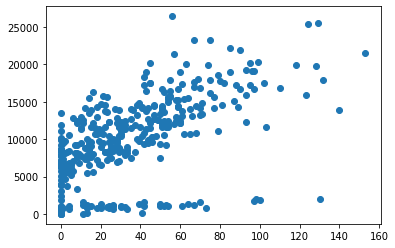

In [55]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
## there seems to be a correlation for people that do more than 5000 steps. bot not for the one bellow...

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [56]:
# your answer here
np.corrcoef(fitbit['Minutes Sedentary'],fitbit['Steps'])

array([[1.        , 0.07690608],
       [0.07690608, 1.        ]])

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

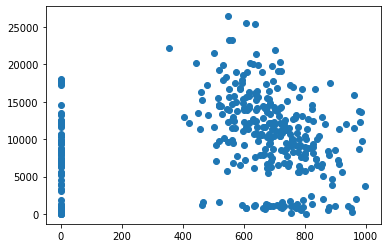

In [58]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])


## could be a negative correlation for the observations with more than 5000 steps and for the one with not 0 minutes... but anyway its probably a small correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [60]:
# your answer here
np.corrcoef(fitbit['MinutesOfSleep'],fitbit['Steps'])

array([[1.        , 0.13098566],
       [0.13098566, 1.        ]])

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

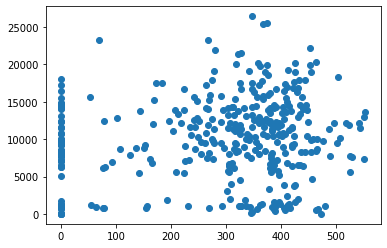

In [61]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])


## no correlation....

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [66]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

fitbit_sub = fitbit[column]

cor_fit=fitbit_sub.corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [71]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

### Minutes Very Active, and maybe Floord and Calorie burned...

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [73]:
# your answer here
path = 'C:/Users/haenni/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv'
ds= pd.read_csv(path)
ds.head()

Name  Study time  Grade
0    Jose           4      4
1   Maria           9      7
2   David           8      9
3   Sonia          10      7
4  Samuel          20      9

#### Show visually the frequency distribution of the time_grades dataset.

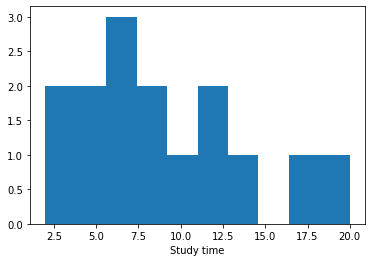

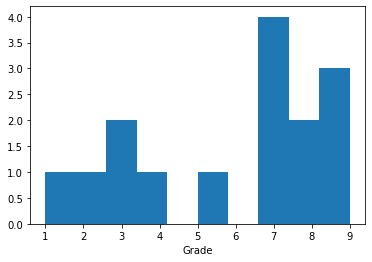

In [84]:
# your answer here
plt.hist(x='Study time', data = ds)
plt.xlabel('Study time')
plt.show()
plt.hist(x='Grade', data = ds)
plt.xlabel('Grade')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [91]:
# your answer here

## Pearson
print("Pearson: " + str(ds['Study time'].corr(ds['Grade'], method="pearson")))


## Spearman

print("Spearman: "+str(ds['Study time'].corr(ds['Grade'], method="spearman")))


Pearson: 0.7980456073578858
Spearman: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

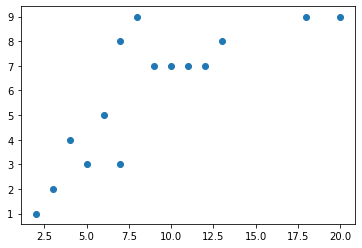

In [85]:
# your answer here
plt.scatter(x= 'Study time', y='Grade', data = ds)
## yes, you can see a correlation, but probably its not a linear relationship, especially nont for the study after 7.5.. --- proof of decreasing marginal benefit

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
'''
Copy from internet: 

Pearson correlation assumes that the data we are comparing is normally distributed. When that assumption is not true, the correlation value is reflecting the true association. Spearman correlation does not assume that data is from a specific distribution, so it is a non-parametric correlation measure. Spearman correlation is also known as Spearmanâ€™s rank correlation as it computes correlation coefficient on rank values of the data.
'''

'''
in my words: 

Pearson correlation ist for normal distributions (what we dont have in our dataset heere); Spearmann Correlation for any other distribution: thats the better one for our dataset!